# EDA - Explanatory Data Analysis - on Satellite Imagery

Hyperspectral Image(HSI) data often contains hundreds of spectral bands over the same spatial area which provide valuable information to identify the various materials. In HSI, each pixel can be regarded as a high dimensional vector whose entries correspond to the spectral reflectance from visible to infrared.

There are 14 datatsets available in EarthPy package.

In [41]:
import earthpy as ep
import earthpy.spatial as es
import earthpy.plot as etp
import matplotlib.pyplot as plt
from glob import glob

ep.data.path = '.'
# sepcify the dataset name to download 
data = ep.data.get_data('vignette-landsat')

In [29]:
data

'./vignette-landsat/.'

In [31]:
landsat_path = glob('vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif')
landsat_path.sort()

The bands are selected and stacked using the 'stack' method from the spatial module of EarthPy. 

In [35]:
# stacking bands
arr_st, meta = es.stack(landsat_path, nodata=-9999)
# print metadata
for i, j in meta.items():
    print("%10s : %s"%(i, str(j)))

    driver : GTiff
     dtype : int16
    nodata : -9999.0
     width : 2158
    height : 1941
     count : 7
       crs : EPSG:32613
 transform : | 30.00, 0.00, 449085.00|
| 0.00,-30.00, 4434855.00|
| 0.00, 0.00, 1.00|
blockysize : 1
     tiled : False
interleave : band


The dataset has the shape (2158, 1941), 7 bands.

### Plot Bands

We plot the bands using the inbuilt method 'plot_bands' form the earthpy package.
The plot_bands method takes the stack of the bands and plots along with custom titles which can be done by passing unique titles for each image as a list of titles using the title= parameter.

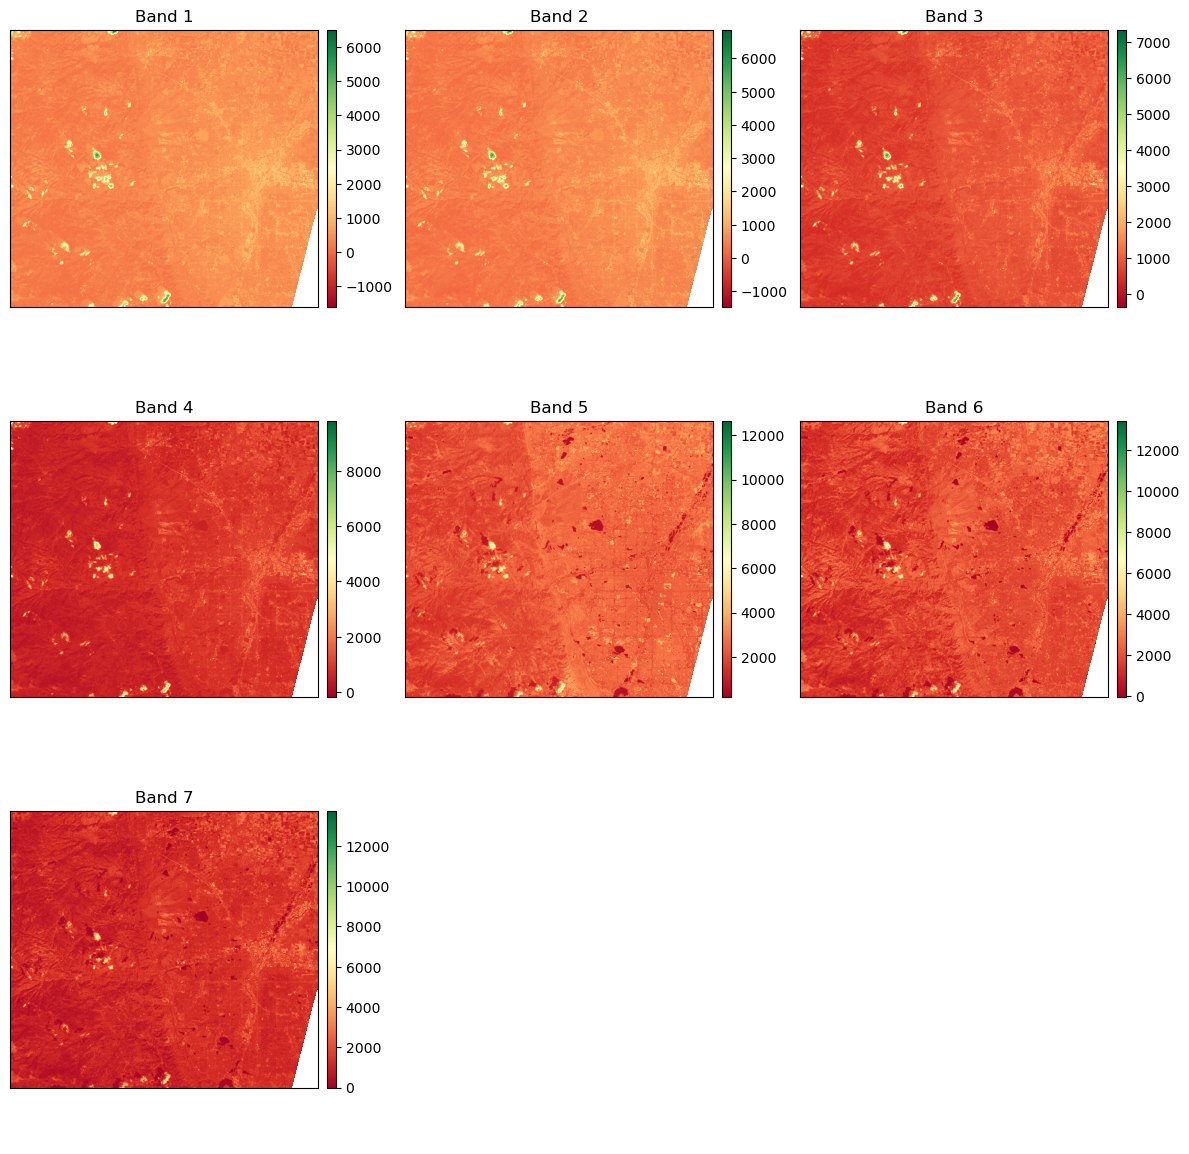

In [43]:
im = etp.plot_bands(arr_st, cmap='RdYlGn', figsize=(12, 12))
plt.show()